In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cPickle as cp
import sys
import os
from plotting_performance_vs_metric import get_measurement_metric, get_performance_metric, average_results_array, median_results_array
from plotting_performance_vs_metric import get_rff_memory, get_nystrom_memory
import math
from copy import deepcopy

### the data folder is called full tuning run but it is the full run after tuning round

In [2]:
def get_performance_list(n_feat_list, general_folder, folder_pattern, seeds, min_metric_best, performance_file_name, do_median):
        metric_list_all = []
        for seed in seeds:
            metric_list = []
            for n_feat in n_feat_list:
                subfolder = deepcopy(folder_pattern)
#                 subfolder = subfolder.replace("type_unk", "type_rff")
                subfolder = subfolder.replace("n_fp_feat_unk", "n_fp_feat_" + str(n_feat) )
                subfolder = subfolder.replace("seed_unk", "seed_" + str(seed) )
                folder_name = general_folder + "/" + subfolder
                file_name = performance_file_name
                metric = get_performance_metric(folder_name, file_name, min_best=min_metric_best)
                metric_list.append(metric)
            metric_list_all.append(np.array(deepcopy(metric_list) ) )
        if do_median:
            metric_list_all = median_results_array(metric_list_all)
        else:
            metric_list_all = average_results_array(metric_list_all)
        return metric_list_all

In [3]:
def get_metric_list(n_feat_list, general_folder, folder_pattern, seeds, min_metric_best, metric_file_name, metric_name, do_median):
        metric_list_all = []
        for seed in seeds:
            metric_list = []
            for n_feat in n_feat_list:
                subfolder = deepcopy(folder_pattern)
#                 subfolder = subfolder.replace("type_unk", "type_rff")
                subfolder = subfolder.replace("n_fp_feat_unk", "n_fp_feat_" + str(n_feat) )
                subfolder = subfolder.replace("seed_unk", "seed_" + str(seed) )
                folder_name = general_folder + "/" + subfolder
                file_name = metric_file_name
                metric = get_measurement_metric(folder_name, file_name, metric_name)
                metric_list.append(metric)
            metric_list_all.append(np.array(deepcopy(metric_list) ) )
        if do_median:
            metric_list_all = median_results_array(metric_list_all)
        else:
            metric_list_all = average_results_array(metric_list_all)
        return metric_list_all

In [4]:
def plot_full_run(n_rff_feat, n_nystrom_feat, general_folder_performance, general_folder_metric, folder_pattern, seeds=[1,], 
                  rff_mem_func=None, nystrom_mem_func=None, min_metric_best=True, 
                  performance_file_name="eval_metric.txt", 
                  metric_file_name="metric_sample_eval.txt", do_median=False):
    memory_list_rff = np.array( [rff_mem_func(n_feat) for n_feat in n_rff_feat] )
    subfolder_pattern = folder_pattern.replace("type_unk", "type_rff")
    performance_list_rff = get_performance_list(n_rff_feat, general_folder_performance, subfolder_pattern, seeds, min_metric_best, performance_file_name, do_median)
    metric_list_rff = get_metric_list(n_rff_feat, general_folder_metric, subfolder_pattern, seeds, min_metric_best, metric_file_name, metric_name=None, do_median=do_median)
    
    
    memory_list_nystrom = np.array( [nystrom_mem_func(n_feat) for n_feat in n_nystrom_feat] )
    subfolder_pattern = folder_pattern.replace("type_unk", "type_nystrom")
    performance_list_nystrom = get_performance_list(n_nystrom_feat, general_folder_performance, subfolder_pattern, seeds, min_metric_best, performance_file_name, do_median)
    metric_list_nystrom = get_metric_list(n_nystrom_feat, general_folder_metric, subfolder_pattern, seeds, min_metric_best, metric_file_name, metric_name=None, do_median=do_median)
    
    plt.figure()
    plt.plot(n_rff_feat, np.sqrt(np.array(performance_list_rff).astype(np.float64) ), "-o", label="rff")
    plt.plot(n_nystrom_feat, np.sqrt(np.array(performance_list_nystrom).astype(np.float64) ), "-o", label="nystrom")
    plt.title("metric vs n feat")
    plt.legend()
#     plt.yscale("log")
    plt.xscale("log")
    plt.grid()
    plt.show()
    
    plt.figure()
    plt.plot(memory_list_rff, np.array(performance_list_rff).astype(np.float64), "-o", label="rff")
    plt.plot(memory_list_nystrom, np.array(performance_list_nystrom).astype(np.float64), "-o", label="nystrom")
    plt.title("metric vs n memory")
    plt.legend()
#     plt.yscale("log")
    plt.xscale("log")
    plt.grid()
    plt.show()
    
    plt.figure()
    plt.plot(n_rff_feat, np.array(metric_list_rff).astype(np.float64), "-o", label="rff")
    plt.plot(n_nystrom_feat, np.array(metric_list_nystrom).astype(np.float64), "-o", label="nystrom")
    plt.title("kernel approx. error vs n feat")
    plt.legend()
#     plt.yscale("log")
    plt.xscale("log")
    plt.grid()
    plt.show()
    
    plt.figure()
    plt.plot(memory_list_rff, np.array(metric_list_rff).astype(np.float64), "-o", label="rff")
    plt.plot(memory_list_nystrom, np.array(metric_list_nystrom).astype(np.float64), "-o", label="nystrom")
    plt.title("kernel approx. error vs n memory")
    plt.legend()
#     plt.yscale("log")
    plt.xscale("log")
    plt.grid()
    plt.show()

census heldout sqrt l2


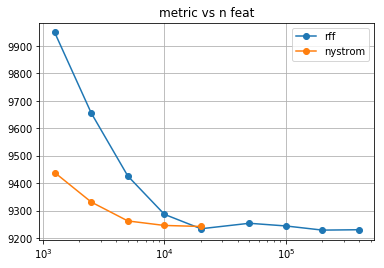

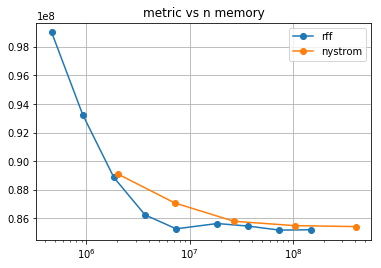

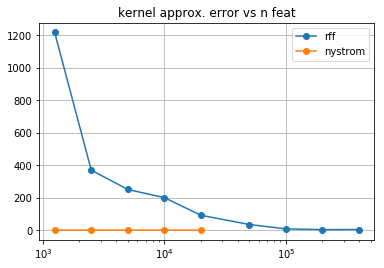

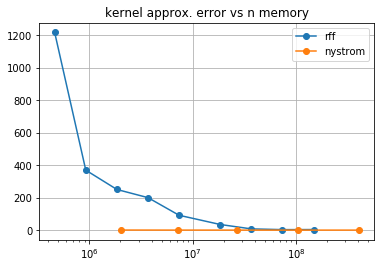

In [5]:
print "census heldout sqrt l2"
m = 250
r = 119
rff_mem_func = lambda n : get_rff_memory(n, m, r)
nystrom_mem_func = lambda n : get_nystrom_memory(n, m, r)
general_folder_performance = "/dfs/scratch0/zjian/lp_kernel/nystrom_vs_rff_large_exp/full_tuning_run"
general_folder_metric = "/dfs/scratch0/zjian/lp_kernel/nystrom_vs_rff_large_exp/full_tuning_run_kernel_approx_error"
subfolder_pattern = "census_type_unk_l2_reg_0_n_fp_feat_unk_opt_sgd_lr_0.5_seed_unk"
nystrom_feat_list = [1250, 2500, 5000, 10000, 20000]
rff_feat_list = [1250, 2500, 5000, 10000, 20000, 50000, 100000, 200000, 400000]
plot_full_run(rff_feat_list, nystrom_feat_list, general_folder_performance, general_folder_metric, subfolder_pattern, seeds=[1,2,3], 
            rff_mem_func=rff_mem_func, nystrom_mem_func=nystrom_mem_func, min_metric_best=True)

yearpred heldout sqrt l2


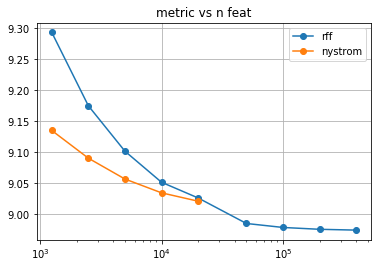

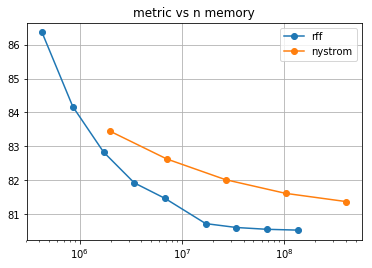

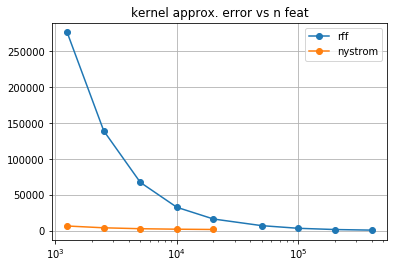

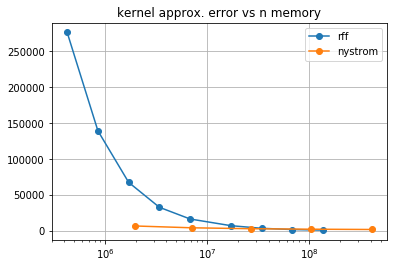

In [6]:
print "yearpred heldout sqrt l2"
m = 250
r = 90
rff_mem_func = lambda n : get_rff_memory(n, m, r)
nystrom_mem_func = lambda n : get_nystrom_memory(n, m, r)
general_folder_performance = "/dfs/scratch0/zjian/lp_kernel/nystrom_vs_rff_large_exp/full_tuning_run"
general_folder_metric = "/dfs/scratch0/zjian/lp_kernel/nystrom_vs_rff_large_exp/full_tuning_run_kernel_approx_error"
subfolder_pattern = "yearpred_type_unk_l2_reg_0_n_fp_feat_unk_opt_sgd_lr_0.5_seed_unk"
nystrom_feat_list = [1250, 2500, 5000, 10000, 20000]
rff_feat_list = [1250, 2500, 5000, 10000, 20000, 50000, 100000, 200000, 400000]
plot_full_run(rff_feat_list, nystrom_feat_list, general_folder_performance, general_folder_metric, subfolder_pattern, seeds=[1,2,3], 
            rff_mem_func=rff_mem_func, nystrom_mem_func=nystrom_mem_func, min_metric_best=True)

covtype heldout accuray


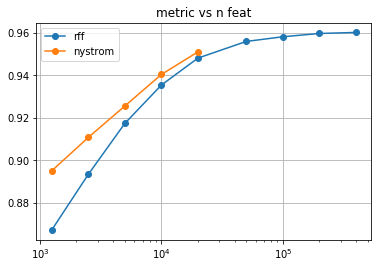

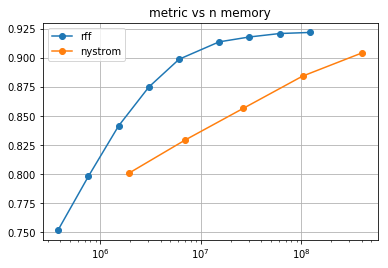

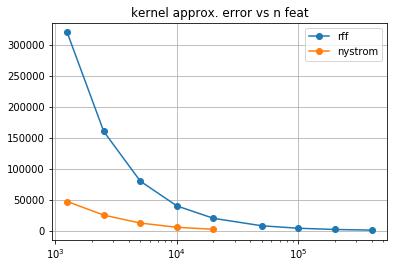

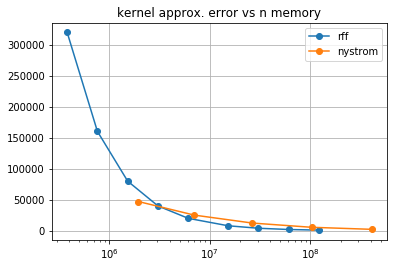

In [7]:
print "covtype heldout accuray"
m = 250
r = 54
rff_mem_func = lambda n : get_rff_memory(n, m, r)
nystrom_mem_func = lambda n : get_nystrom_memory(n, m, r)
general_folder_performance = "/dfs/scratch0/zjian/lp_kernel/nystrom_vs_rff_large_exp/full_tuning_run"
general_folder_metric = "/dfs/scratch0/zjian/lp_kernel/nystrom_vs_rff_large_exp/full_tuning_run_kernel_approx_error"
subfolder_pattern = "covtype_type_unk_l2_reg_0_n_fp_feat_unk_opt_sgd_lr_50.0_seed_unk"
nystrom_feat_list = [1250, 2500, 5000, 10000, 20000]
rff_feat_list = [1250, 2500, 5000, 10000, 20000, 50000, 100000, 200000, 400000]
plot_full_run(rff_feat_list, nystrom_feat_list, general_folder_performance, general_folder_metric, subfolder_pattern, seeds=[1,2,3,], 
            rff_mem_func=rff_mem_func, nystrom_mem_func=nystrom_mem_func, min_metric_best=False)

covtype heldout cross entropy


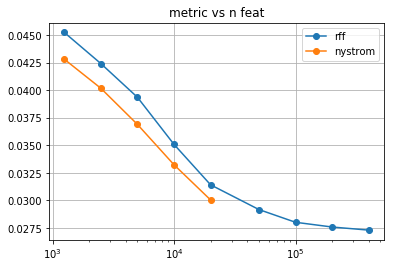

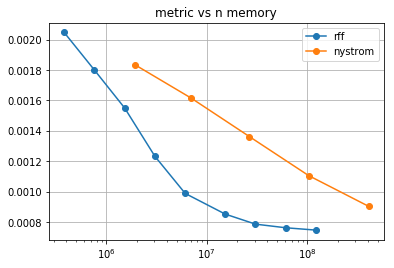

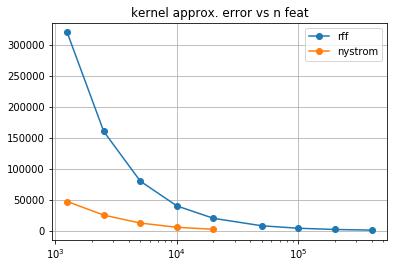

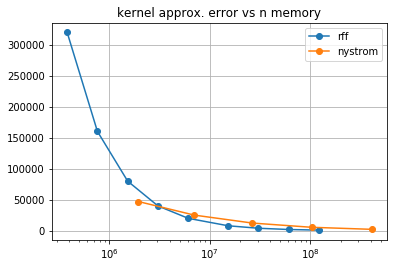

In [8]:
print "covtype heldout cross entropy"
m = 250
r = 54
rff_mem_func = lambda n : get_rff_memory(n, m, r)
nystrom_mem_func = lambda n : get_nystrom_memory(n, m, r)
general_folder_performance = "/dfs/scratch0/zjian/lp_kernel/nystrom_vs_rff_large_exp/full_tuning_run"
general_folder_metric = "/dfs/scratch0/zjian/lp_kernel/nystrom_vs_rff_large_exp/full_tuning_run_kernel_approx_error"
subfolder_pattern = "covtype_type_unk_l2_reg_0_n_fp_feat_unk_opt_sgd_lr_50.0_seed_unk"
nystrom_feat_list = [1250, 2500, 5000, 10000, 20000]
rff_feat_list = [1250, 2500, 5000, 10000, 20000, 50000, 100000, 200000, 400000]
plot_full_run(rff_feat_list, nystrom_feat_list, general_folder_performance, general_folder_metric, subfolder_pattern, seeds=[1,2,3,], 
            rff_mem_func=rff_mem_func, nystrom_mem_func=nystrom_mem_func, min_metric_best=True, performance_file_name="monitor_signal.txt")

timit heldout accuracy


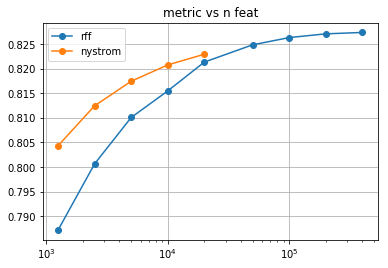

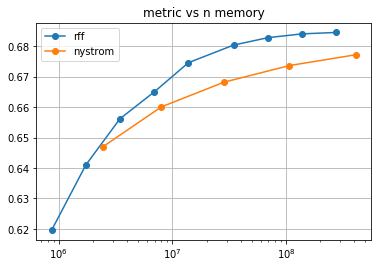

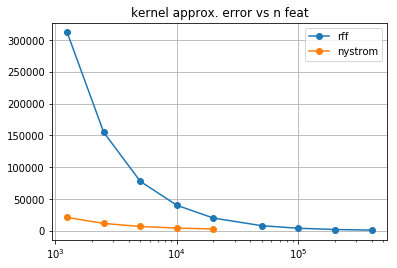

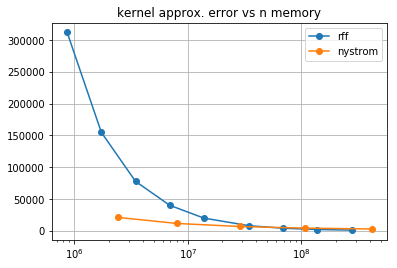

In [9]:
print "timit heldout accuracy"
m = 250
r = 440
rff_mem_func = lambda n : get_rff_memory(n, m, r)
nystrom_mem_func = lambda n : get_nystrom_memory(n, m, r)
general_folder_performance = "/dfs/scratch0/zjian/lp_kernel/nystrom_vs_rff_large_exp/full_tuning_run"
general_folder_metric = "/dfs/scratch0/zjian/lp_kernel/nystrom_vs_rff_large_exp/full_tuning_run_kernel_approx_error"
subfolder_pattern = "timit_type_unk_l2_reg_0_n_fp_feat_unk_opt_sgd_lr_100.0_seed_unk"
nystrom_feat_list = [1250, 2500, 5000, 10000, 20000]
rff_feat_list = [1250, 2500, 5000, 10000, 20000, 50000, 100000, 200000, 400000]
plot_full_run(rff_feat_list, nystrom_feat_list, general_folder_performance, general_folder_metric, subfolder_pattern, seeds=[1,2,3], 
            rff_mem_func=rff_mem_func, nystrom_mem_func=nystrom_mem_func, min_metric_best=False)

timit heldout cross entropy


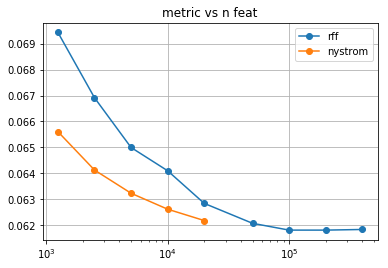

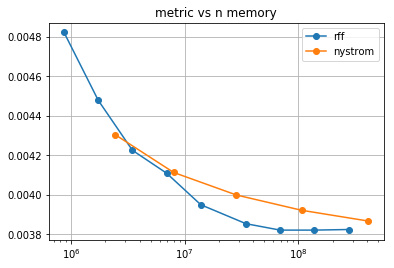

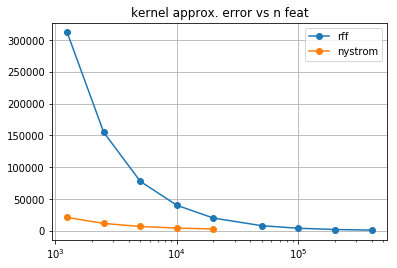

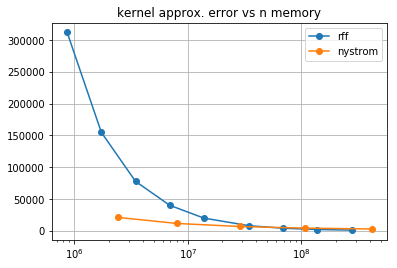

In [10]:
print "timit heldout cross entropy"
m = 250
r = 440
rff_mem_func = lambda n : get_rff_memory(n, m, r)
nystrom_mem_func = lambda n : get_nystrom_memory(n, m, r)
general_folder_performance = "/dfs/scratch0/zjian/lp_kernel/nystrom_vs_rff_large_exp/full_tuning_run"
general_folder_metric = "/dfs/scratch0/zjian/lp_kernel/nystrom_vs_rff_large_exp/full_tuning_run_kernel_approx_error"
subfolder_pattern = "timit_type_unk_l2_reg_0_n_fp_feat_unk_opt_sgd_lr_100.0_seed_unk"
nystrom_feat_list = [1250, 2500, 5000, 10000, 20000]
rff_feat_list = [1250, 2500, 5000, 10000, 20000, 50000, 100000, 200000, 400000]
plot_full_run(rff_feat_list, nystrom_feat_list, general_folder_performance, general_folder_metric, subfolder_pattern, seeds=[1,2,3], 
            rff_mem_func=rff_mem_func, nystrom_mem_func=nystrom_mem_func, min_metric_best=True, performance_file_name="monitor_signal.txt")